In [1]:
from pycocotools.coco import COCO
import os
import json
os.chdir("../")
os.getcwd()

'/workspace'

In [2]:
coco_train = COCO("./data/COCO/Annotations/instances_train2014.json")
coco_train_cap = COCO("./data/COCO/Annotations/captions_train2014.json")
coco_val = COCO("./data/COCO/Annotations/instances_val2014.json")
coco_val_cap = COCO("./data/COCO/Annotations/captions_val2014.json")

loading annotations into memory...
Done (t=8.43s)
creating index...
index created!
loading annotations into memory...
Done (t=0.57s)
creating index...
index created!
loading annotations into memory...
Done (t=4.25s)
creating index...
index created!
loading annotations into memory...
Done (t=0.23s)
creating index...
index created!


In [84]:
#train image number
len(coco_train.getImgIds()),len(coco_val.getImgIds())

(82783, 40504)

In [85]:
# image jpg file nubmer in folder
len(os.listdir("./data/COCO/Images/")),len(os.listdir("./data/COCO/Images/"))

(164063, 164063)

In [5]:
# 한 이미지당 평균 annotation 개수
print("Average number of annotations per image in train: ", len(coco_train.anns)/len(coco_train.imgs))
print("Average number of annotations per image in val: ", len(coco_val.anns)/len(coco_val.imgs))

Average number of annotations per image in train:  7.307140354903785
Average number of annotations per image in val:  7.206078412008691


In [11]:
# coco_train.cats 의 슈퍼 카테고리만 출력
print("Super categories in train: ", set([coco_train.cats[cat_id]["supercategory"] for cat_id in coco_train.cats.keys()]))
print("Super categories in val: ", set([coco_val.cats[cat_id]["supercategory"] for cat_id in coco_val.cats.keys()]))

Super categories in train:  {'accessory', 'animal', 'kitchen', 'appliance', 'electronic', 'outdoor', 'vehicle', 'food', 'furniture', 'person', 'indoor', 'sports'}
Super categories in val:  {'accessory', 'animal', 'kitchen', 'appliance', 'electronic', 'outdoor', 'vehicle', 'food', 'furniture', 'person', 'indoor', 'sports'}


In [12]:
#일반 카테고리
print("Categories in train: ", set([coco_train.cats[cat_id]["name"] for cat_id in coco_train.cats.keys()]))
print("Categories in val: ", set([coco_val.cats[cat_id]["name"] for cat_id in coco_val.cats.keys()]))

Categories in train:  {'remote', 'cell phone', 'parking meter', 'zebra', 'baseball glove', 'mouse', 'tennis racket', 'carrot', 'clock', 'toilet', 'skateboard', 'train', 'bus', 'frisbee', 'cup', 'spoon', 'donut', 'bed', 'elephant', 'knife', 'refrigerator', 'toaster', 'bottle', 'tie', 'sports ball', 'traffic light', 'oven', 'truck', 'dining table', 'banana', 'apple', 'chair', 'motorcycle', 'cake', 'umbrella', 'cow', 'handbag', 'laptop', 'teddy bear', 'sheep', 'vase', 'stop sign', 'microwave', 'giraffe', 'couch', 'car', 'wine glass', 'fork', 'sandwich', 'airplane', 'hair drier', 'surfboard', 'fire hydrant', 'tv', 'toothbrush', 'bear', 'book', 'cat', 'sink', 'baseball bat', 'suitcase', 'bird', 'broccoli', 'pizza', 'orange', 'keyboard', 'skis', 'potted plant', 'person', 'horse', 'dog', 'boat', 'snowboard', 'kite', 'bowl', 'bench', 'bicycle', 'scissors', 'hot dog', 'backpack'}
Categories in val:  {'remote', 'cell phone', 'parking meter', 'zebra', 'baseball glove', 'mouse', 'tennis racket', '

In [39]:
import random

In [86]:
# load image 95989
img_id = 95989
img = coco_train.loadImgs(img_id)[0]
img

{'license': 2,
 'file_name': 'COCO_train2014_000000095989.jpg',
 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000095989.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-16 13:41:02',
 'flickr_url': 'http://farm9.staticflickr.com/8390/8462634584_32c11c5e0c_z.jpg',
 'id': 95989}

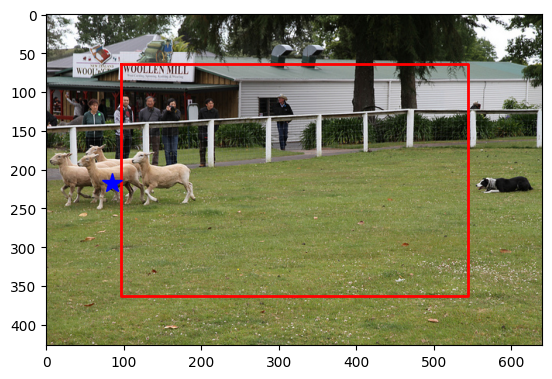

In [82]:
#load random image and segment its max object
img = coco_train.loadImgs(95989) #574001, 341550
#img = coco_train.loadImgs(random.choice(coco_train.getImgIds()))
# draw a mid rectangle 
#width_area = [0+width*((1-thrs)/2), width-width*((1-thrs)/2)] ,height_area = [0+height*((1-thrs)/2), height-height*((1-thrs)/2)]
# 70% zone 
width_area = [0+img[0]["width"]*((1-0.7)/2), img[0]["width"]-img[0]["width"]*((1-0.7)/2)]
height_area = [0+img[0]["height"]*((1-0.7)/2), img[0]["height"]-img[0]["height"]*((1-0.7)/2)]
# show mid point of max annotation
annIds = coco_train.getAnnIds(imgIds=img[0]['id'], iscrowd=None)
anns = coco_train.loadAnns(annIds)
max_ann = max(anns, key=lambda x: x['area'])
midpoint_max = [max_ann['bbox'][0]+max_ann['bbox'][2]/2, max_ann['bbox'][1]+max_ann['bbox'][3]/2]
# show image with mid rectangle
I = io.imread(img[0]['coco_url'])
plt.imshow(I)
plt.plot([width_area[0], width_area[1], width_area[1], width_area[0], width_area[0]], [height_area[0], height_area[0], height_area[1], height_area[1], height_area[0]], linewidth=2, color='r')
# plot midpoint max with blue star with big size
plt.plot(midpoint_max[0], midpoint_max[1], 'b*', markersize=15)
plt.show()


In [60]:
plural_map = {'person': 'people', 'bus': 'buses', 'bench':'benches','couch': 'couches', 'sandwich': 'sandwiches', 'scissors':'scissorses', 'knife':'knives', 'toothbrush':'toothbrushes'}

def pluraliize(word):
    if word in plural_map:
        return plural_map[word]
    else:
        return word + 's'

In [61]:
def get_img_info(coco, coco_cap):
    outputs = {}
    for i in coco.getImgIds():
        img_info = {}
        img_info['file_name'] = coco.loadImgs(i)[0]['file_name']
        img_info['width'] = coco.loadImgs(i)[0]['width']
        img_info['height'] = coco.loadImgs(i)[0]['height']
        
        ann_ids = coco.getAnnIds(imgIds=i, catIds=[], iscrowd=False)
        anns = coco.loadAnns(ann_ids)
                
        img_info['objects_count'] = len(anns)
        if not anns:
            img_info.update({
                'max_obj_id': None,
                'max_obj_cat_id': None,
                'max_obj_super_cat': None,
                'max_obj_cat': None,
                'max_obj_area': None,
                'max_obj_midpoint': None,
                'max_obj_bbox': None,
                'max_obj_segment_points': None,
                'max_obj_area_portion': None,
                'captions': None,
            })
        else:
            sorted_anns = sorted(anns, key=lambda x: x['area'], reverse=True)
            max_ann = sorted_anns[0]
            
            img_info['max_obj_id'] = max_ann['id']
            img_info['max_obj_cat_id'] = max_ann['category_id']
            img_info['max_obj_super_cat'] = [coco.cats[max_ann['category_id']]['supercategory'], pluraliize(coco.cats[max_ann['category_id']]['supercategory'])]
            img_info['max_obj_cat'] = coco.cats[max_ann['category_id']]['name'], pluraliize(coco.cats[max_ann['category_id']]['name'])
            img_info['max_obj_area'] = max_ann['area']
            img_info['max_obj_midpoint'] = [max_ann['bbox'][0] + max_ann['bbox'][2] / 2, max_ann['bbox'][1] + max_ann['bbox'][3] / 2]
            img_info['max_obj_bbox'] = max_ann['bbox']
            img_info['max_obj_segment_points'] = max_ann['segmentation']
            img_info['max_obj_area_portion'] = max_ann['area'] / (coco.loadImgs(i)[0]['height'] * coco.loadImgs(i)[0]['width'])
            img_info["captions"] = [coco_cap.anns[annId]["caption"] for annId in coco_cap.getAnnIds(imgIds=i)]
        
        outputs[i] = img_info
        
    return outputs

In [62]:
output_val = get_img_info(coco_val, coco_val_cap)
output_train = get_img_info(coco_train, coco_train_cap)
output = {**output_train, **output_val}
with open('./data/COCO/Annotations/coco_img_info.json', 'w') as f:
    json.dump(output, f)